# Laboratorio 6 Ecuación Cuadrática - Método Clásico y Po Shen Loh
Juan Sebastian Montoya Combita

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

In [2]:
def f(x, e): #f(x,e) e es el número de las funciones establecidas para los demás puntos
  if (e==0):
    return (x**2)
  elif (e==1):
    return ((x-1)**2)
  elif (e==2):
    return ((x**2)-1)
  elif (e==3):
    return ((x**2)+1)
  else:
    print("Valor incorrecto")

In [3]:
def df(z, de): #función de las derivadas de las funciones
  if (de==0):
    return (2*z)
  elif (de==1):
    return (2*z-2) 

In [4]:
def graficar(liminf,limsup,inter,titulo, e): # función para hacer las, los parámetros de ingreso son límite inferior de la función, límite superior, y el intervalo de evaluación de fx, recibe un string llamado titulo para la gráfica y e será usada en f(x)
  x = np.linspace(liminf,limsup,inter)
  fig, ax = plt.subplots()
  ax.plot(x,f(x,e))
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.grid(True, which='both')
  plt.title(titulo)
  plt.xlabel('x')
  plt.ylabel('f(x)')

In [5]:
def display1(e,de,titulo,z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(e, de,z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(z)='+titulo)
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


Modifique el siguiente código de Python el cual implementa los métodos clásicos y Po Shen Lo' s para la solución de ecuaciones cuadráticas y:
1.   Grafique las siguientes funciones dentro de un rango en x que incluya las raices (si hay) y el vértice.






*   $x^2$


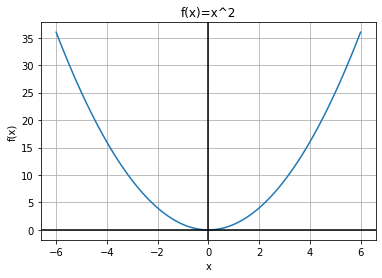

In [6]:
titulo='f(x)=x^2'
graficar(-6,6,100, titulo, 0)



*   $(x-1)^2$



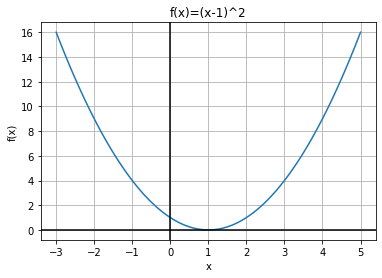

In [7]:
titulo='f(x)=(x-1)^2'
graficar(-3,5,100, titulo, 1)



*   $x^2-1$



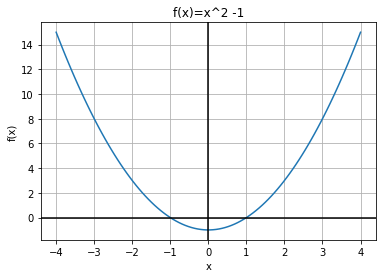

In [8]:
titulo='f(x)=x^2 -1'
graficar(-4,4,100, titulo, 2)



*   $x^2+1$



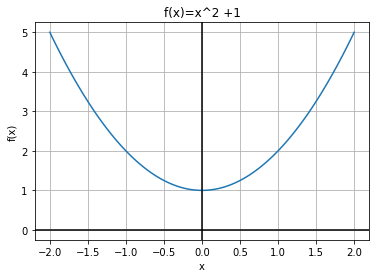

In [9]:
titulo='f(x)=x^2 +1'
graficar(-2,2,100, titulo, 3)

2.   Aplique los métodos Clásicos y de Po Shen Loh ‘s para solucionar las siguientes ecuaciones cuadráticas. 



In [10]:
x = Symbol('x')

Función intermedia para la extracción de coeficientes

In [11]:
def extcoef(polinomio, excepcion):  #el argumento excepcion sirve para la correcta distribución de coeficiente de ecuaciones de la forma x^2+C donde B=0
  coeficientes= polinomio.coeffs() #extrae los coeficientes
  if (len(coeficientes)==1):
    coeficientes= np.array([coeficientes[0], 0 , 0]) # en caso de tener ecuación de la forma x^2, llenará los sigueintes coeficientes con 0
  elif (len(coeficientes)==2):
    if (excepcion == True):
      coeficientes = np.array([coeficientes[0],0,coeficientes[1]]) # caso ecuación x^2 + C
    else:
      coeficientes = np.array([coeficientes[0], coeficientes[1], 0]) # en caso de tener ecuación de la forma x^2+BX, llenará el coeficiente C con 0
  return (coeficientes)

Programación del Método de Po Shen Loh para ecuaciones de la forma $x^2+Bx+C$

In [12]:
def poshenlo(ecuacion, excepcion):
  coeficientes= extcoef(ecuacion, excepcion)
  centro= (-coeficientes[1])/2
  rsolucion= centro**2 - coeficientes[2] # solución a la ecuación de centro al cuadrado, la variable sirve para determinar si tiene solución real o no
  if (rsolucion<0):
    print("La ecuación no tiene solución real")
    return 
  u1= centro + math.sqrt(rsolucion)
  u2= centro - math.sqrt(rsolucion)
  if (u1 == u2):
    return (u1)
  return (u1, u2)

Programación de la solución cuadrática con la fórmula clásica: $\frac{-b \pm \sqrt{b^2-4ac}}{2a}$

In [13]:
def clasica(ecuacion, excepcion):
  coeficientes= coeficientes= extcoef(ecuacion, excepcion)
  rsol= coeficientes[1]**2 - (4*coeficientes[0]*coeficientes[2])
  if (rsol<0):
    print("La ecuación no tiene solución real")
    return
  solucion1= (-coeficientes[1] + math.sqrt(rsol))/(2*coeficientes[0])
  solucion2= (-coeficientes[1] - math.sqrt(rsol))/(2*coeficientes[0])
  if (solucion1==solucion2):
    return (solucion1)
  return (solucion1, solucion2)




*   $x^2=0$



Solución por método Po Shen Loh

In [14]:
polinomio= Poly(x**2, x) #define una ecuación como un polinomio con la variable simbólica x

In [15]:
psloh=poshenlo(polinomio, False)
psloh

0.0

Solución por método clásico

In [16]:
cuadratica=clasica(polinomio, False)
cuadratica

0



*   $(x-1)^2=0 \rightarrow x^2-2x+1=0$



In [17]:
polinomio=Poly(x**2-(2*x)+1,x)

Solución por método Po Shen Loh

In [18]:
psloh=poshenlo(polinomio, False)
psloh

1.00000000000000

Solución por método clásico

In [19]:
cuadratica=clasica(polinomio, False)
cuadratica

1.00000000000000



*   $x^2-1=0$



In [20]:
polinomio=Poly((x**2-1),x)


Solución por método de Po Shen Loh

In [21]:
poshenlo(polinomio, True)

(1.0, -1.0)

Solución por método clásico

In [22]:
clasica(polinomio, True)

(1.00000000000000, -1.00000000000000)



*   $x^2+1=0$



In [23]:
polinomio=Poly((x**2+1),x)

Solución por método de Po Shen Loh

In [24]:
poshenlo(polinomio, True)

La ecuación no tiene solución real


Solución por método clásico

In [25]:
clasica(polinomio, True)

La ecuación no tiene solución real




3.   Grafique los siguientes polinomios complejos como fractales de Newton





*   $z^2$



In [26]:
def newton_set1(e, de,z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 0


    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z,de)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z,e) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                else:   
                    pixels[height-y-1,x] = (0, 0, 0)
 
    return pixels

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


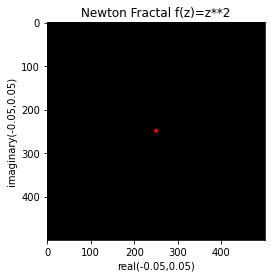

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


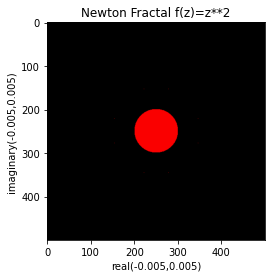

In [27]:
display1(0,0,"z**2",zoom=1/10)
display1(0,0,"z**2",zoom=1/100)



*   $(z-1)^2$



In [28]:
def newton_set1(e, de,z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1


    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z,de)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z,e) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                else:   
                    pixels[height-y-1,x] = (0, 0, 0)
 
    return pixels

Z region from ( 0.95 , -0.05 ) to ( 1.05 , 0.05 )


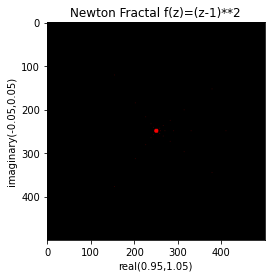

Z region from ( 0.995 , -0.005 ) to ( 1.005 , 0.005 )


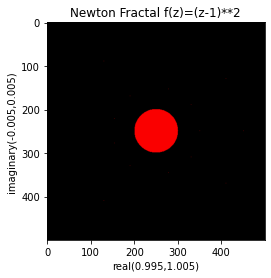

In [29]:
display1(1,1,"(z-1)**2",z_c_r=1, z_c_i=0, zoom=1/10)
display1(1,1,"(z-1)**2",z_c_r=1, z_c_i=0, zoom=1/100)



*   $z^2-1$



In [30]:
def newton_set1(e, de,z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = -1
    r2 =  1


    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z,de)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z,e) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                    pixels[height-y-1,x] = (0, 0, 0)
 
    return pixels

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


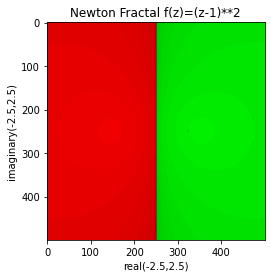

In [31]:
display1(2,0,"(z-1)**2", zoom=5)



*   $x^2+1$



In [32]:
def newton_set1(e, de,z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1j
    r2 =  -1j


    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z,de)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z,e) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                    pixels[height-y-1,x] = (0, 0, 0)
 
    return pixels

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


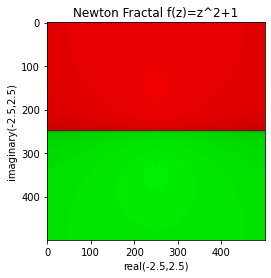

In [33]:
display1(3,0,"z^2+1", zoom=5)

In [34]:
def newtonrapshon(z,e,de, titulo):
  r=[]
  i=[]
  for k in range(50):
    dz = df(z, de)
    z = z - f(z, e) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
  plt.title(titulo)
  plt.plot(r)
  plt.ylabel('Real part')
  plt.show()
  plt.plot(i)
  plt.ylabel('Imagnary part')
  plt.show()



4.   Grafique las iteraciones de Newton para los puntos en los ejes positivos y negativos para los polinomios cuadráticos complejos en el punto anterior, de una interpretación de los resultados


$x^2$

In [35]:
z= 10+0j
titulo = 'Newton iterates form z=10.0 + 0.0j'

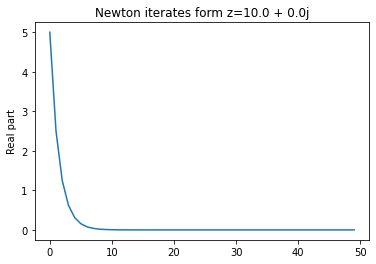

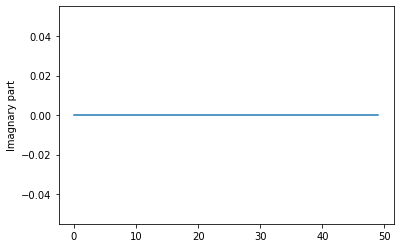

In [36]:
newtonrapshon(z, 0, 0, titulo)



$(x-1)^2$



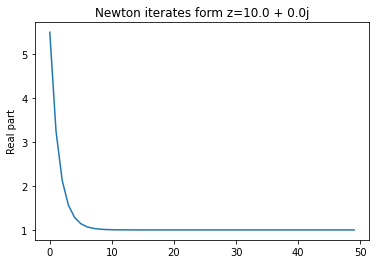

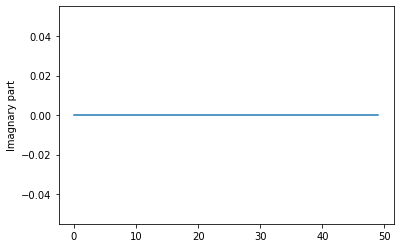

In [37]:
newtonrapshon(z, 1, 1, titulo)

$x^2-1$



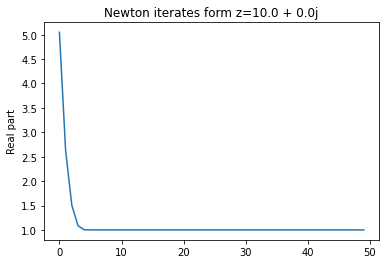

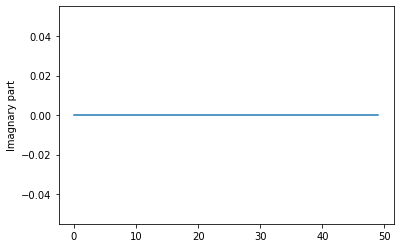

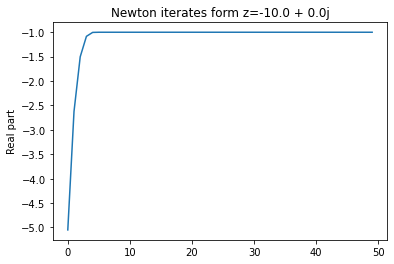

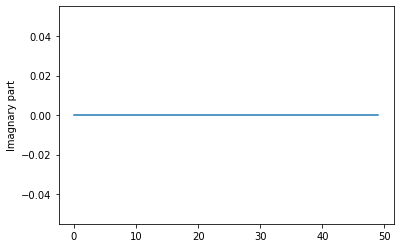

In [38]:
newtonrapshon(z, 2, 0,titulo)
titulo='Newton iterates form z=-10.0 + 0.0j'
newtonrapshon(-10+0j, 2, 0, titulo)

$x^2+1$

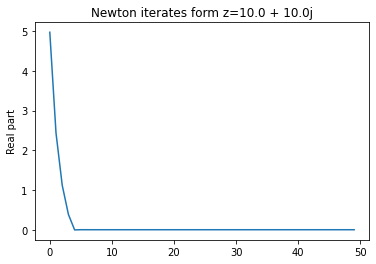

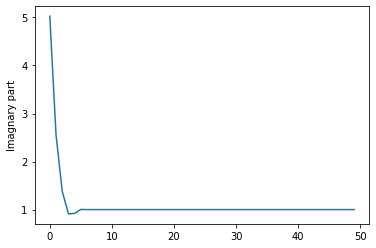

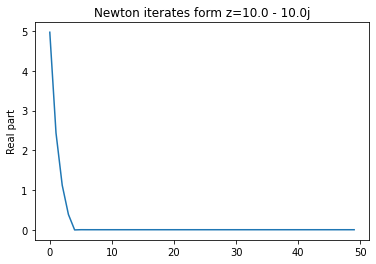

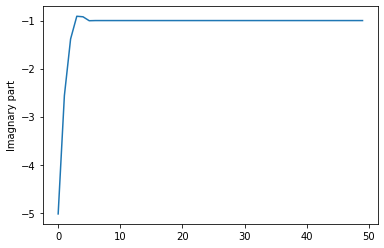

In [39]:
z= 10+10j
titulo= 'Newton iterates form z=10.0 + 10.0j'
newtonrapshon(z, 3, 0, titulo)
z= 10-10j
titulo= 'Newton iterates form z=10.0 - 10.0j'
newtonrapshon(z, 3, 0, titulo)

El método de Newton Rapshon tanto en la parte real como imaginaria convergera a la raíz más próxima, por lo tanto no puede predecir si un polinomio tiene varias soluciones  
En las primeras 3 expresiones al tener una solución real, en el método de Newton rapshon se ve una convergencia rápida en menos de 10 iteraciones, brindando una buena proximidad entre más cerca se encuentre el valor z de la raíz  
En la 4 expresión al tener unicamente una solución compleja, se ve que en la gráfica de Newton Rapshon en la parte real que se tendrán valores que convergen a 0 cuando en realidad es un valor falso, mientras que en la parte compleja convierte correctamente al valor verdadero de la expresión



5.   Grafique las iteraciones de Newton para los puntos en las diagonales en los cuatro cuadrantes in con valor complejo 0.0 +0.0j para los polinomios dados en el ejercicio anterior, de una interpretación de los resultados.



In [41]:
z= 0+0j

$(x-1)^2$

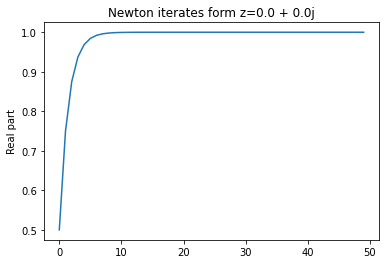

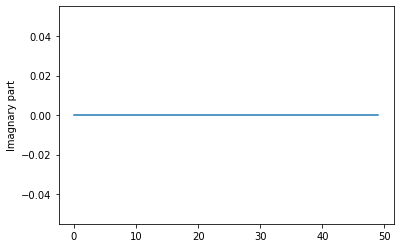

In [42]:
titulo='Newton iterates form z=0.0 + 0.0j'
newtonrapshon(z, 1, 1, titulo)

Debido a la formula de Newton Rapshon, para el caso particular en donde $z= 0+0j$ se tendrá que unicamente será funcional en caso de que $F'(x)\neq 0$, de lo contrario se tendrá una división entre sero dando un resultado indeterminado. Por lo cual en las expresiones 1, 2 y 4 el resultado arrojará un error